# Import Library

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [3]:
iris=sns.load_dataset('iris')

# EDA

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Visualization

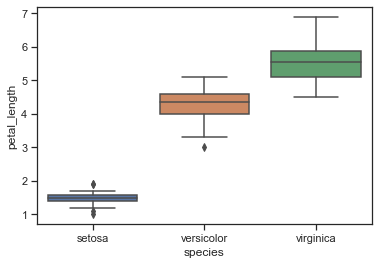

In [10]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x='species',y='petal_length',data=iris)

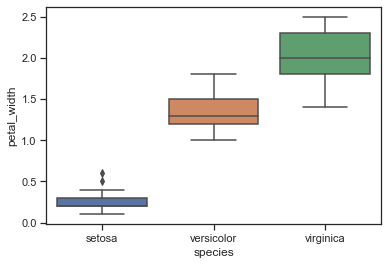

In [11]:
sns.boxplot(x='species',y='petal_width',data=iris)

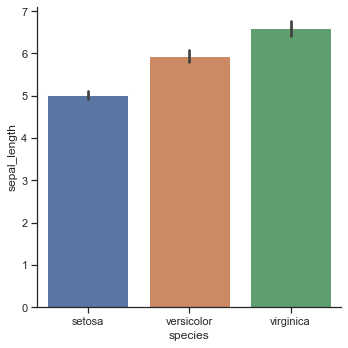

In [12]:
sns.catplot(x='species',y='sepal_length',data=iris ,kind='bar')

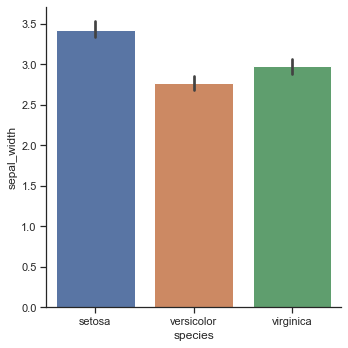

In [13]:
sns.catplot(x='species',y='sepal_width',data=iris ,kind='bar')

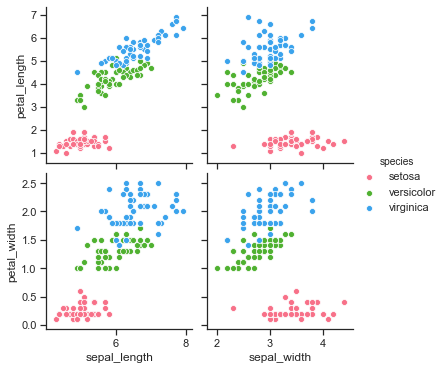

In [14]:
sns.pairplot(iris,x_vars=['sepal_length','sepal_width'],y_vars=['petal_length','petal_width'],palette='husl',hue='species')

C:\Users\hemant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


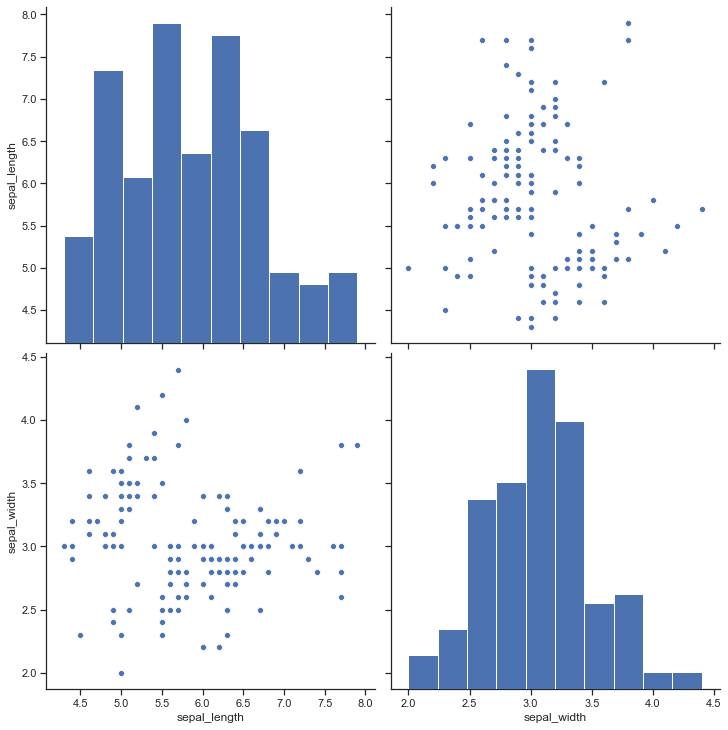

In [15]:
sns.pairplot(iris,size=5,vars=['sepal_length','sepal_width'])

C:\Users\hemant\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


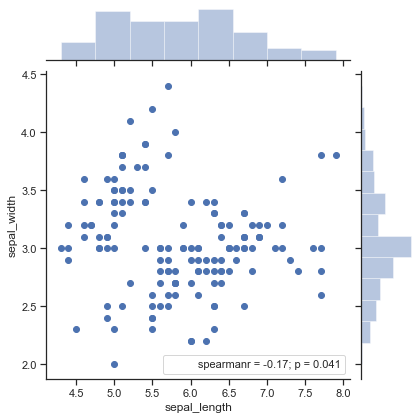

In [18]:
from scipy.stats import spearmanr
sns.jointplot(x='sepal_length',y='sepal_width',data=iris,stat_func=spearmanr)

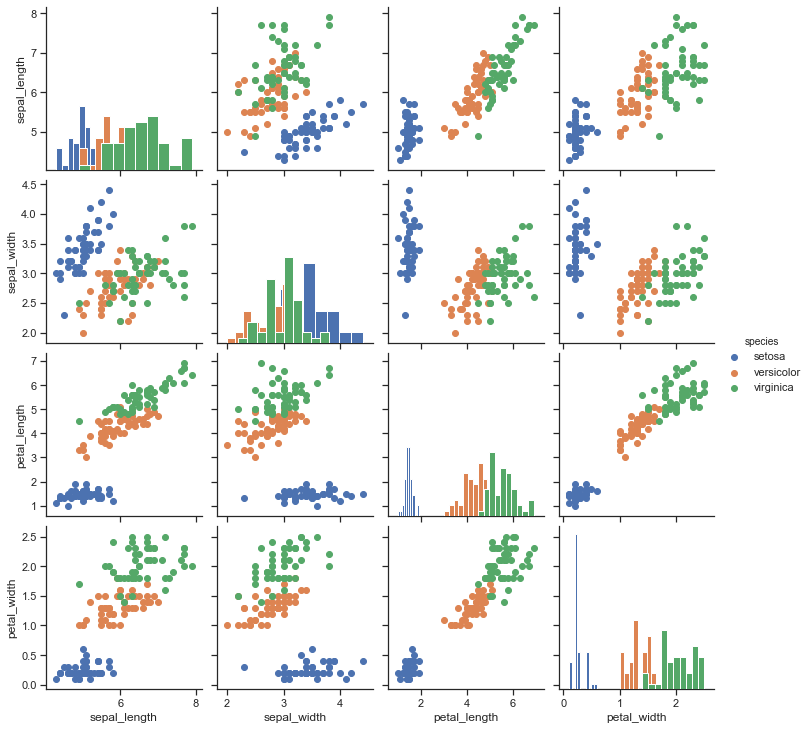

In [22]:
x=sns.PairGrid(iris,hue='species')
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)
x=x.add_legend()

# Machine Learning

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [75]:
train, test = train_test_split(iris, test_size = 0.3,random_state=30)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [76]:
train_x = train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.species
test_x= test[['sepal_length','sepal_width','petal_length','petal_width']] 
test_y =test.species

In [77]:
train_x.head()

,sepal_length,sepal_width,petal_length,petal_width
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
88,5.6,3.0,4.1,1.3


In [78]:
train_y.head()

59    versicolor
94    versicolor
73    versicolor
89    versicolor
88    versicolor
Name: species, dtype: object

In [79]:
test_x.head()

,sepal_length,sepal_width,petal_length,petal_width
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2


In [80]:
test_y.head()

20         setosa
5          setosa
3          setosa
101     virginica
82     versicolor
Name: species, dtype: object

In [81]:
# Support Vector Machine
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.26666666666666666


In [82]:
# Logistic Regression
model =LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the LogisticRegression is:',metrics.accuracy_score(prediction,test_y)) 
#we pas

The accuracy of the LogisticRegression is: 0.3111111111111111


C:\Users\hemant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
# Decision Tree Classifier
model =DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the DecisionTreeClassifier is:',metrics.accuracy_score(prediction,test_y)) 
#we pas

The accuracy of the DecisionTreeClassifier is: 0.24444444444444444


In [84]:
# K-Nearest Neighbour
model =KNeighborsClassifier(n_neighbors=3)
model.fit(train_X,train_y)
prediction=model.predict(test_X) 
print('The accuracy of the KNN is:',metrics.accuracy_score(prediction,test_y)) 

The accuracy of the KNN is: 0.4444444444444444


C:\Users\hemant\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x1f48ecef9c8>,
 <a list of 10 Text xticklabel objects>)

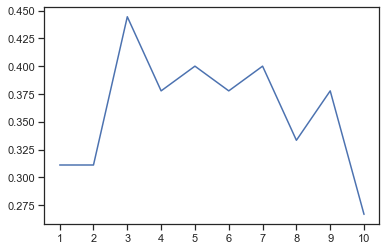

In [85]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)